# Exploration

## Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import pydataset



# Need to add this line to get plots to show!
%matplotlib inline

# Stats
from scipy import stats
import sklearn.preprocessing
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data **to predict property values** using some of their available features; who knows, you might even do some feature engineering to blow them away. **Your goal is to predict the values of single unit properties using the observations from 2017.**

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df, prep_df = w.get_zillow_data()
df

csv file found and loaded


,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA,0.03
2152858,4,3.0,2262,960756,2015,13494.52,Orange,0.01
2152859,4,4.5,3127,536061,2014,6244.16,Orange,0.01
2152861,3,2.5,1974,424353,2015,5302.70,Orange,0.01


In [4]:
train, validate, test = w.get_zillow_split(df)

In [5]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01


In [6]:
train.shape, validate.shape, test.shape

((1219902, 8), (406635, 8), (406635, 8))

In [7]:
tr_sub = train.head(1000)
tr_sub

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01
...,...,...,...,...,...,...,...,...
1368006,3,2.0,1160,123348,1970,1802.02,Ventura,0.01
1436835,3,2.0,1159,95490,1986,1444.05,LA,0.02
2097963,2,1.5,1187,181265,1964,1844.44,Orange,0.01
1665514,3,1.0,901,200629,1949,2505.80,Orange,0.01


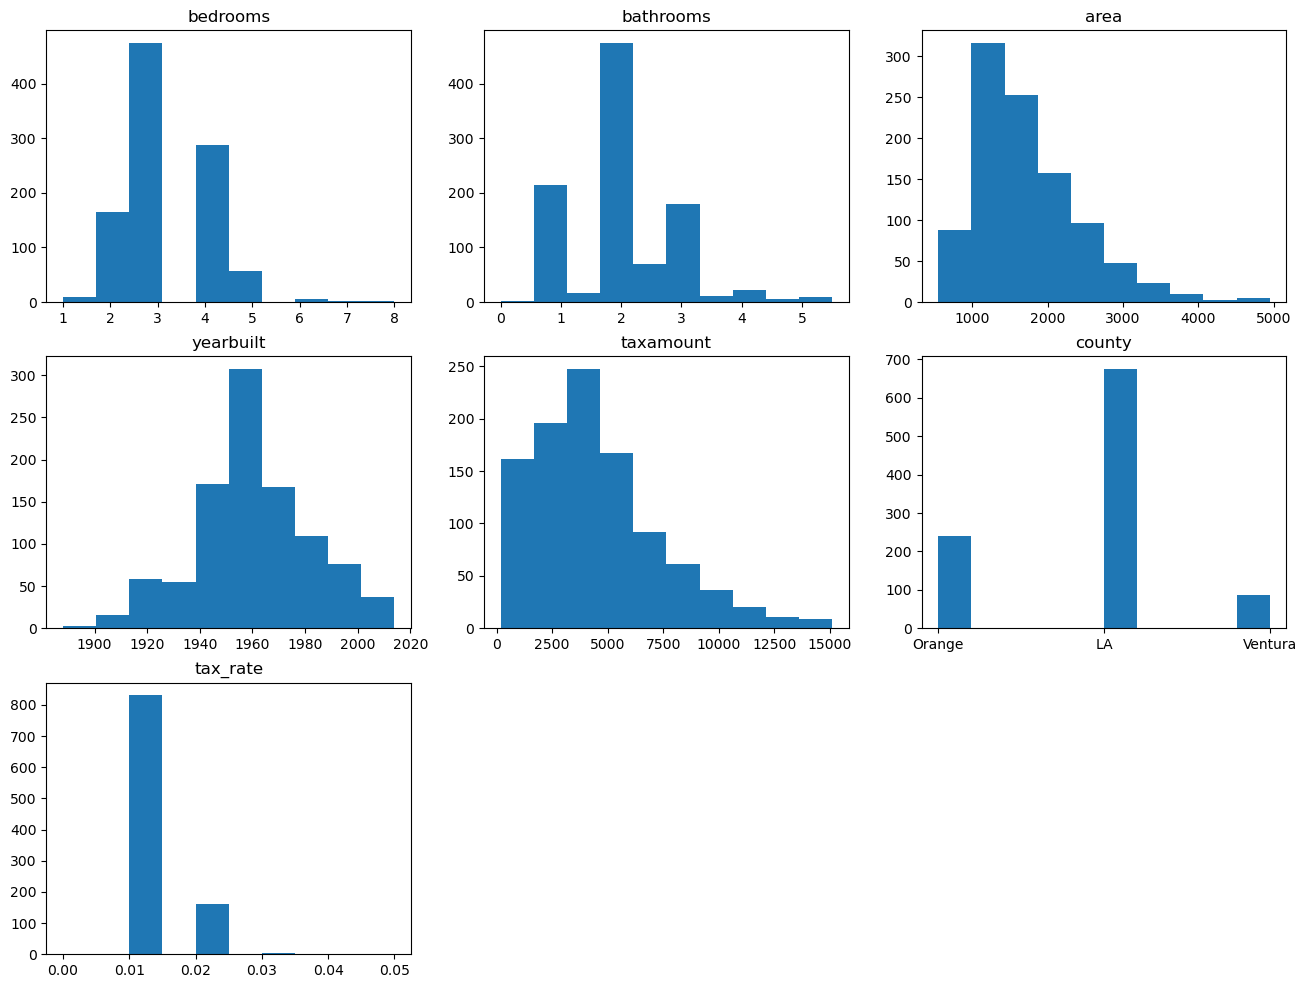

In [8]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['bedrooms','bathrooms','area','yearbuilt','taxamount','county','tax_rate']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [47]:
def plot_variable_pairs(tr_sub):
    # We can drop the redundant information in the upper right half of the chart if we like.
    g = sns.pairplot(data=tr_sub.drop(columns='taxvalue'), corner=True, kind='reg')
    g.map_lower(sns.regplot, line_kws={'color': 'orange'})
    plt.show()


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [52]:
cat_var = ['bedrooms','bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

In [87]:
def plot_categorical_and_continuous_vars(tr_sub, cat_var, cont_var):
    for cat_col in cat_var:
        for cont_col in cont_var:
            # Subset the dataframe based on the loop variables
            temp_df = tr_sub[[cat_col, cont_col]]

            # Boxplot
            plt.figure(figsize=(8,6))
            sns.boxplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Boxplot)")
            plt.show()

            # Violin plot
            plt.figure(figsize=(8,6))
            sns.violinplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Violin plot)")
            plt.show()

            # Swarm plot
            plt.figure(figsize=(8,6))
            sns.swarmplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Swarm plot)")
            plt.show()


### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

>- The function was saved in the explore.py file

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [74]:
cat_var = ['bedrooms','bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

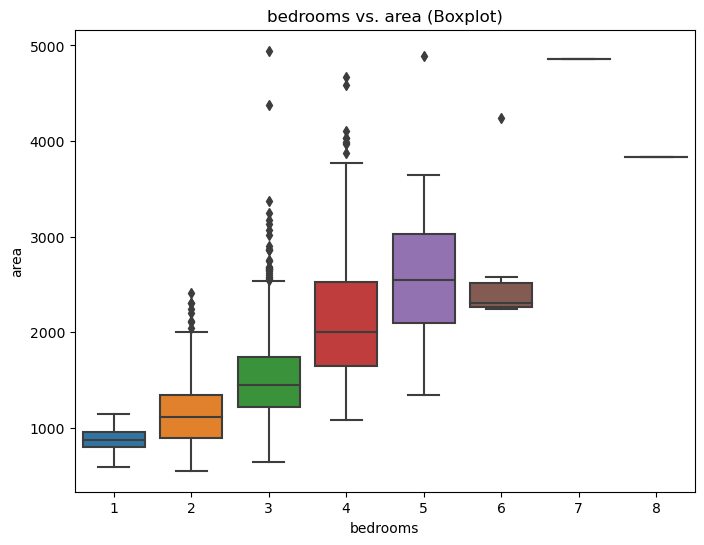

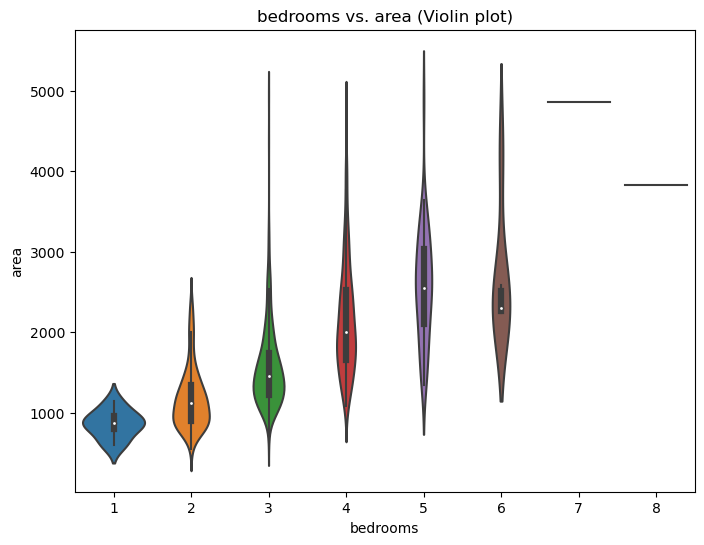

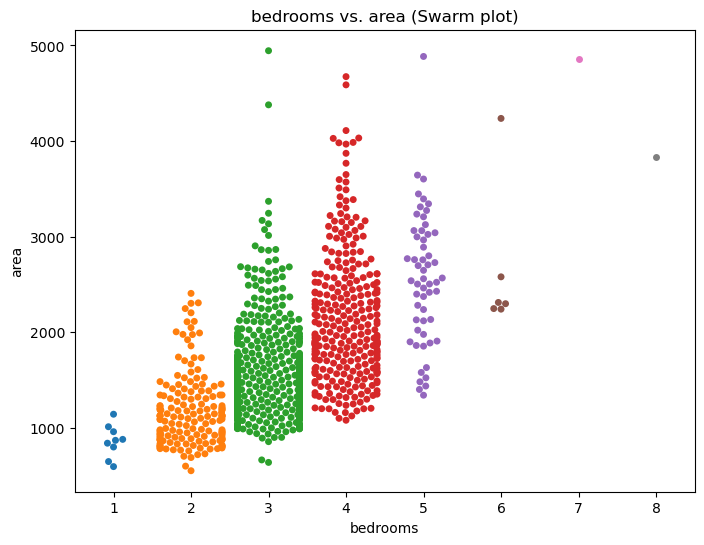

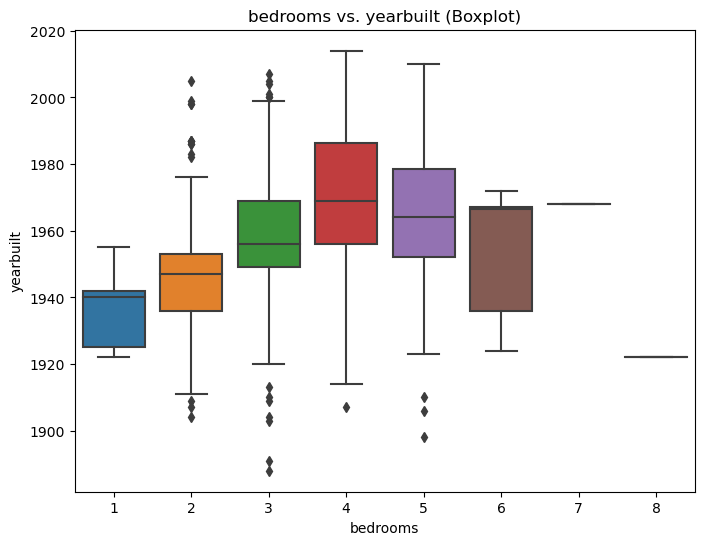

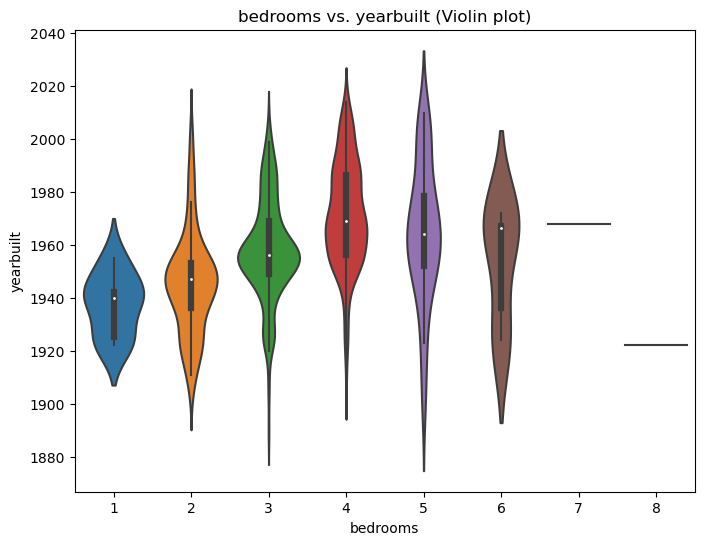

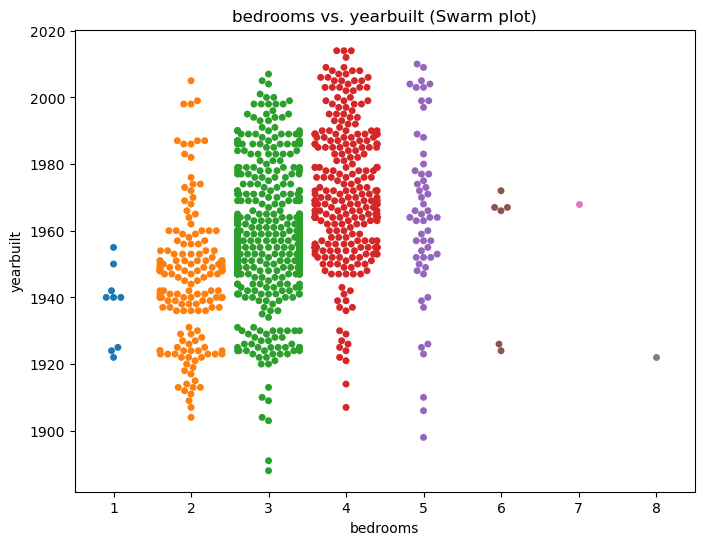

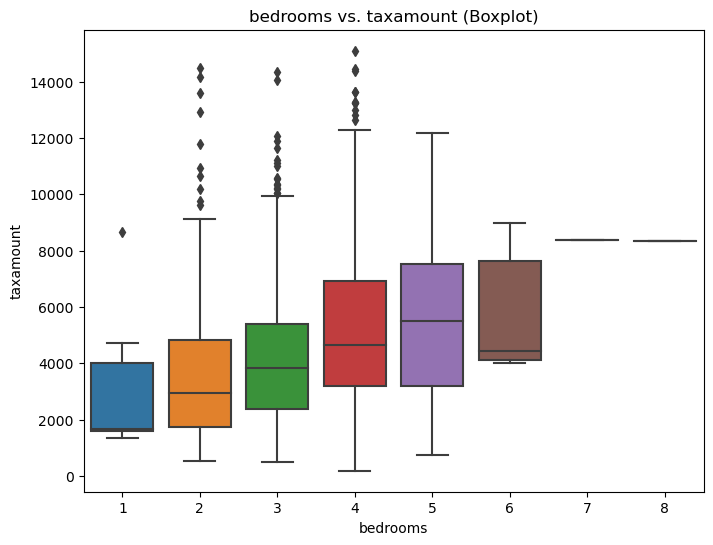

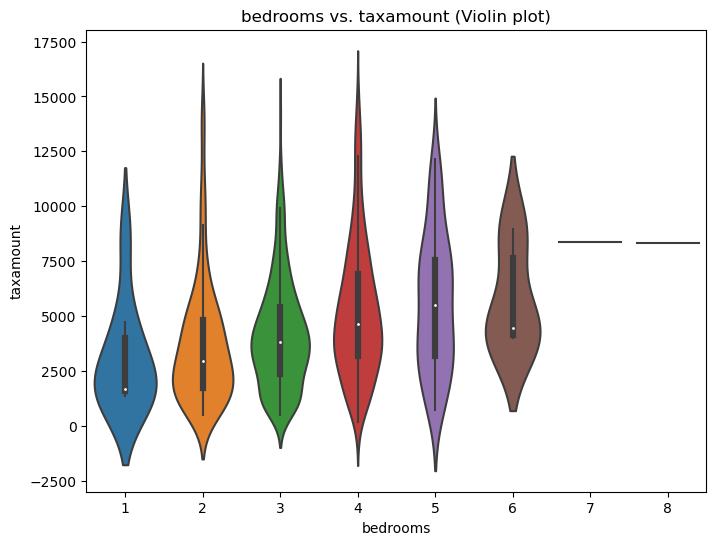

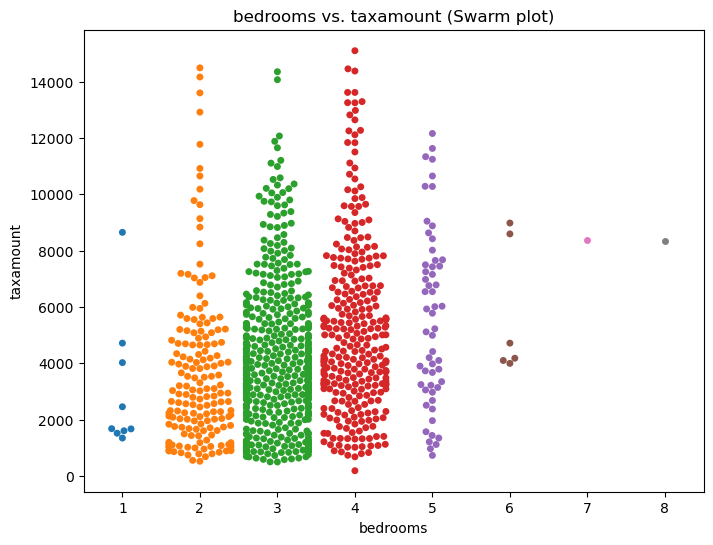

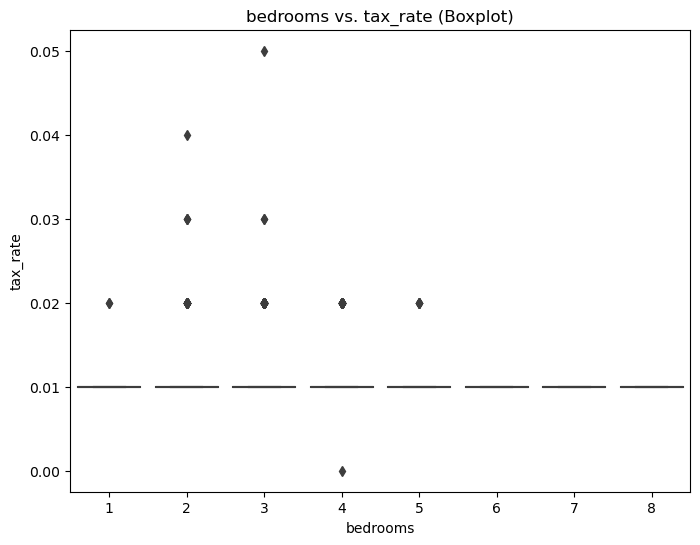

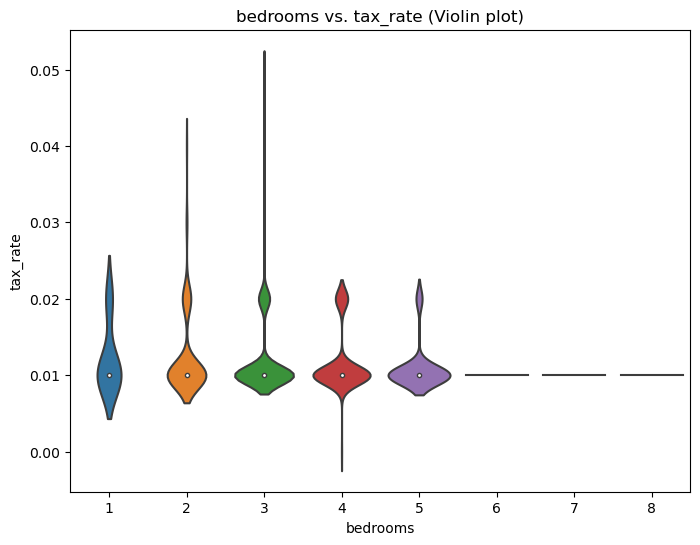

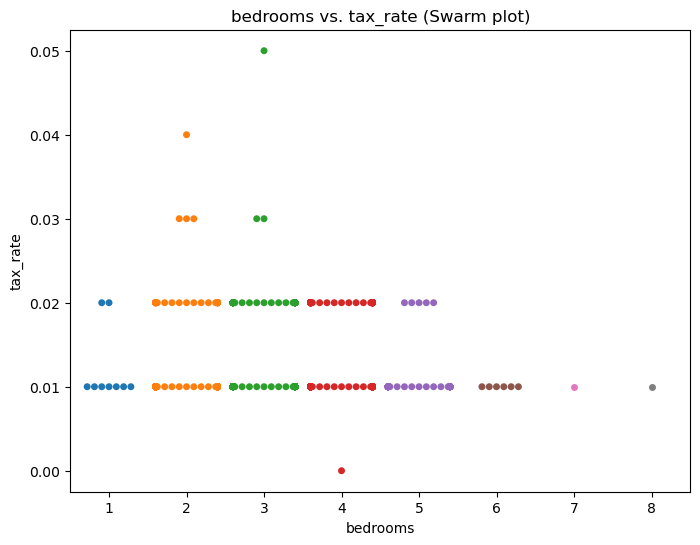

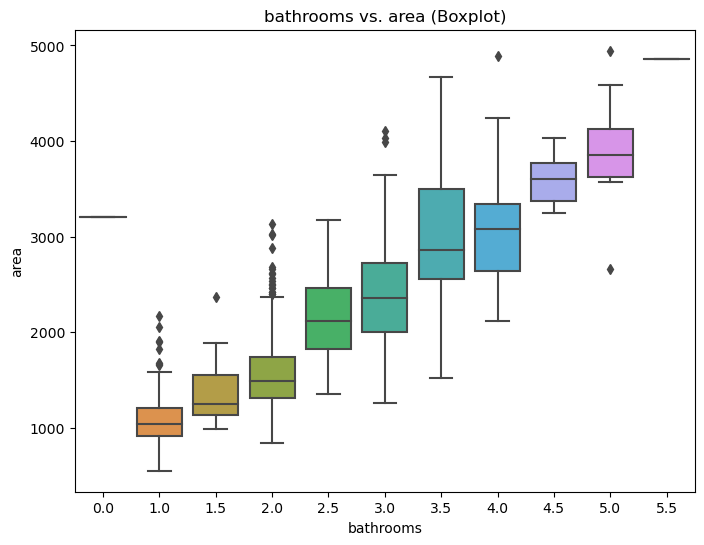

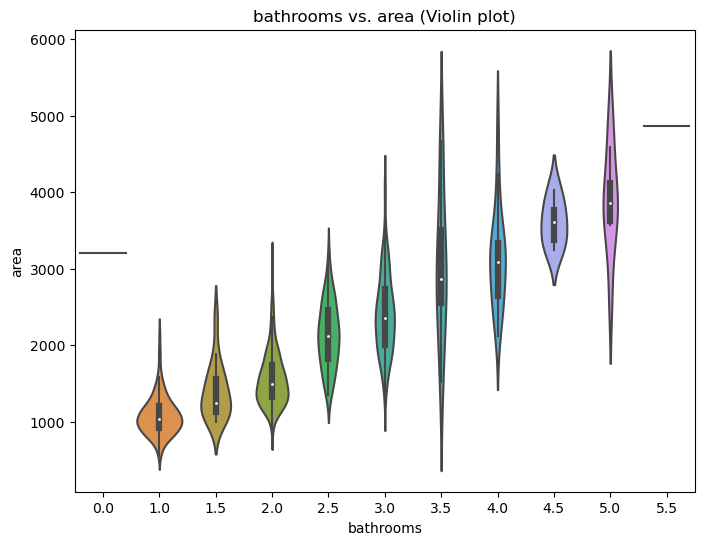

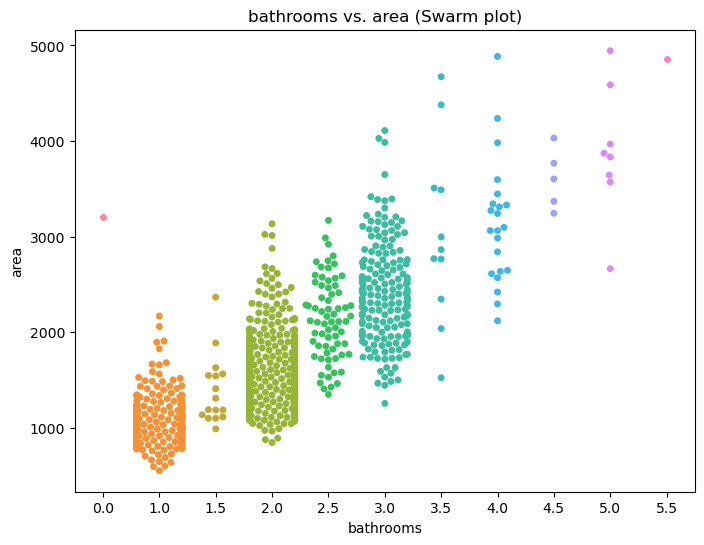

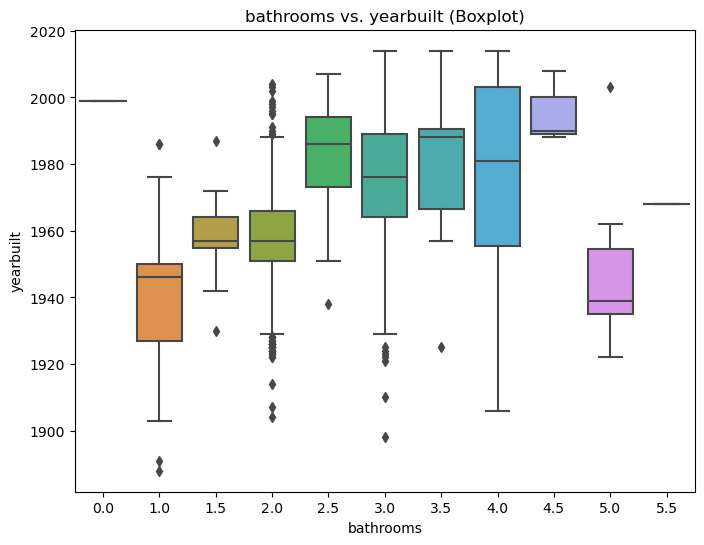

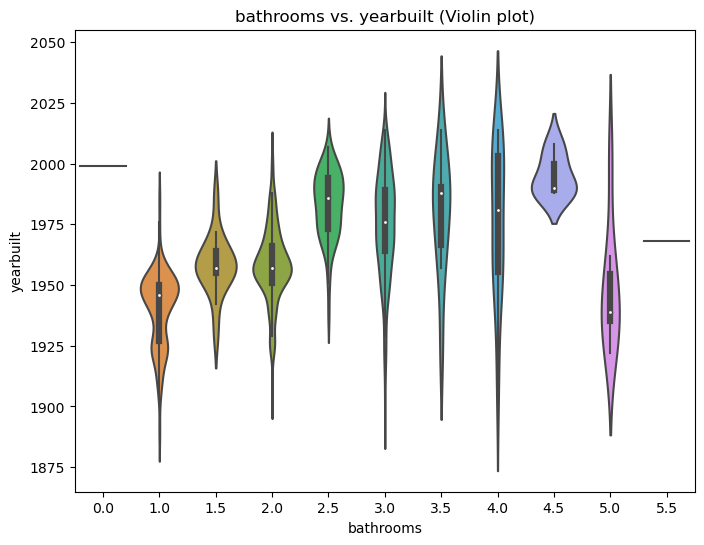

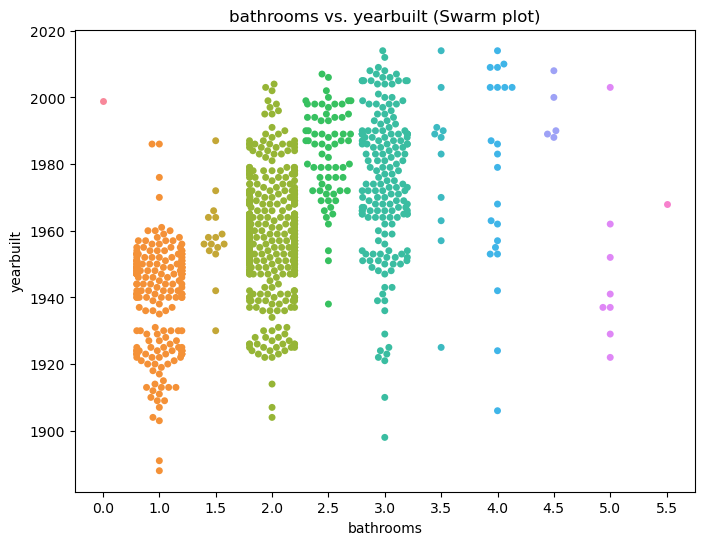

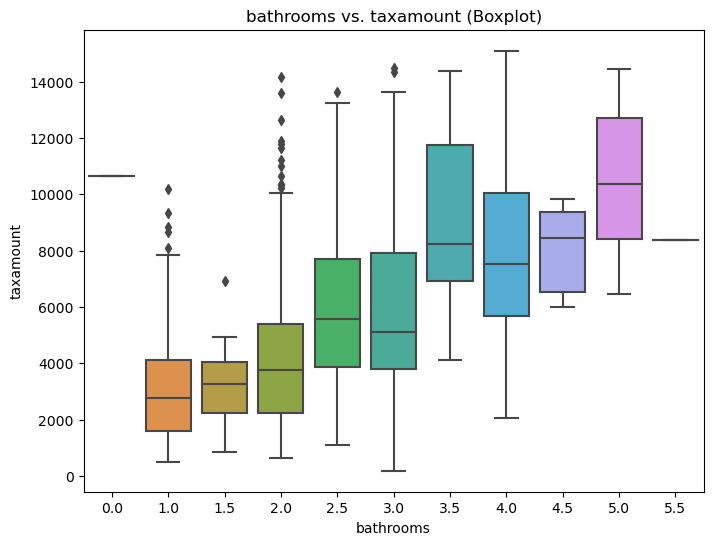

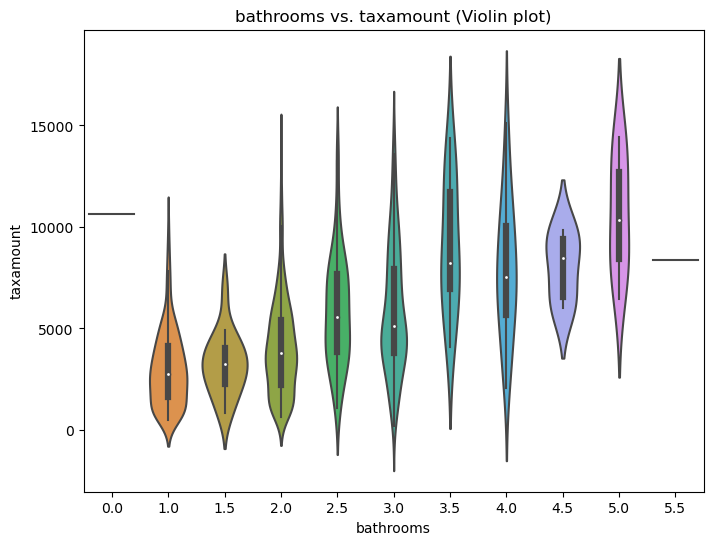

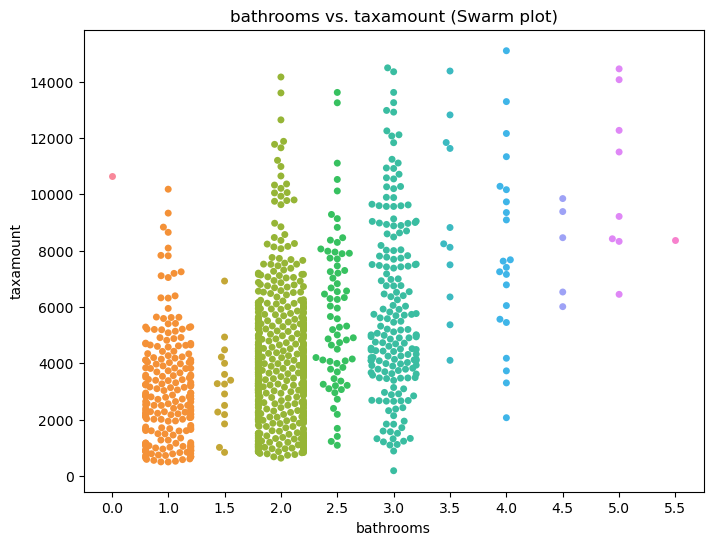

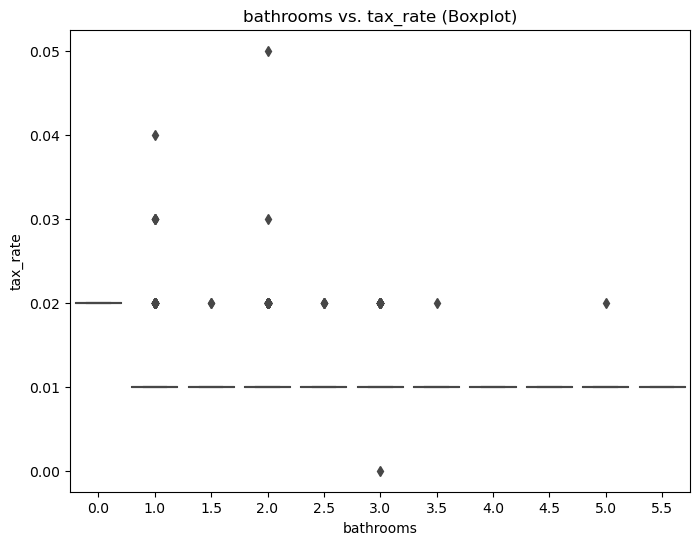

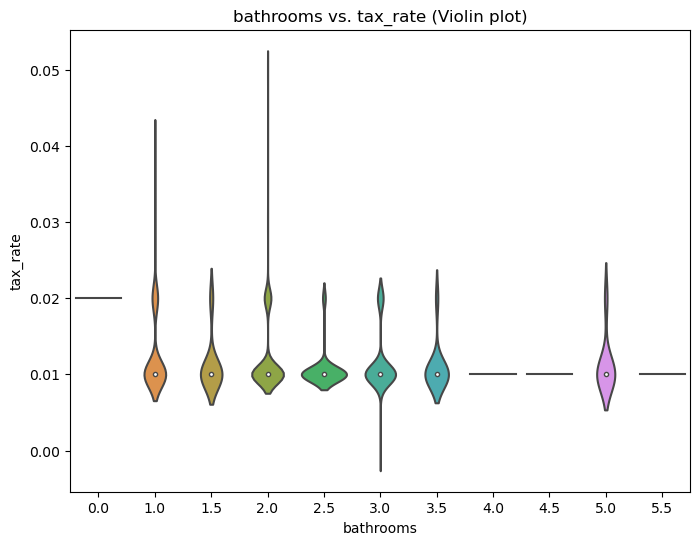

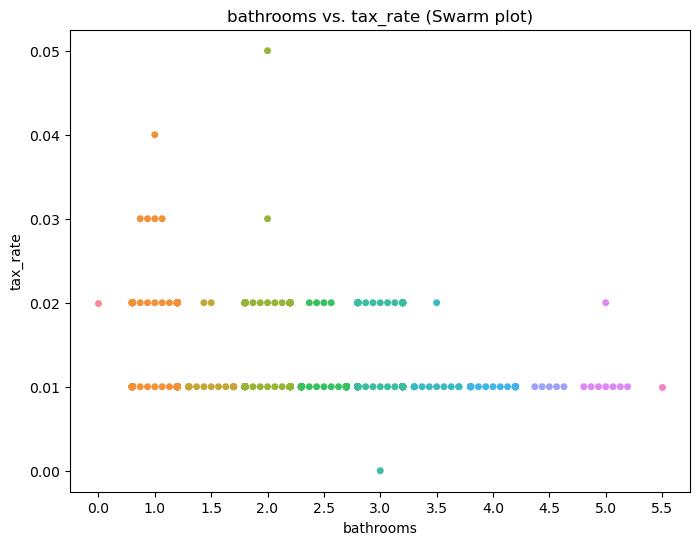

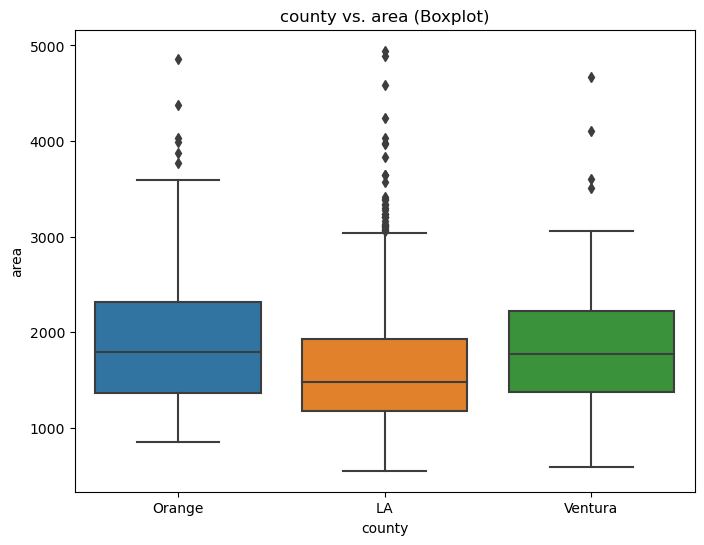

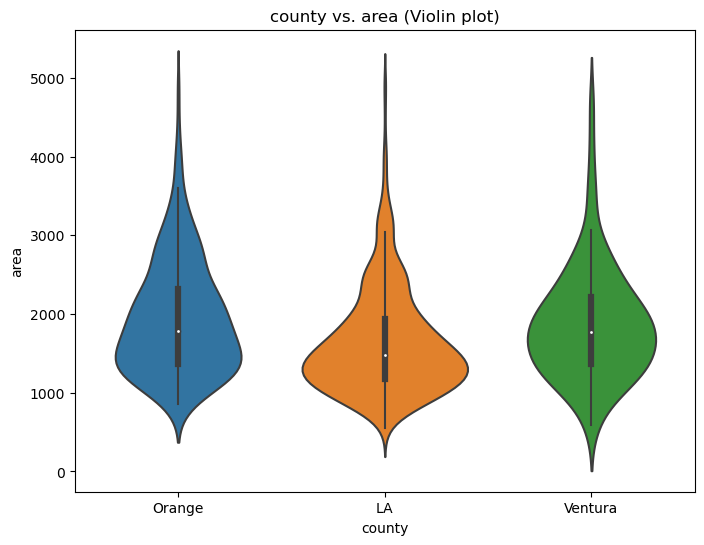

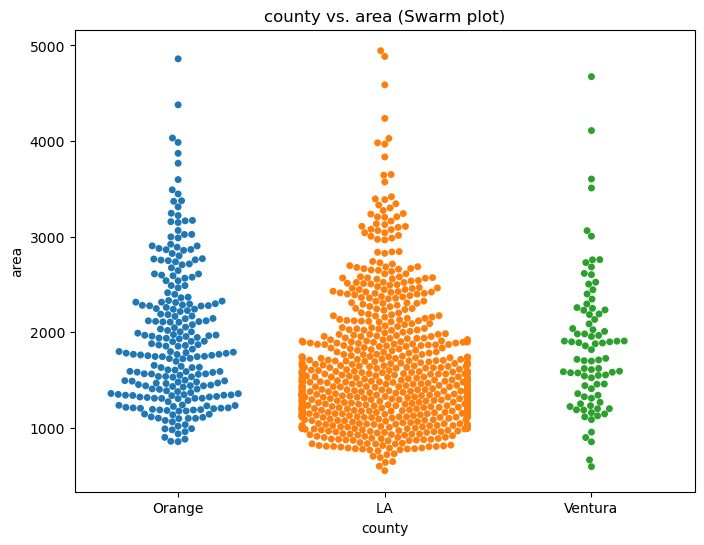

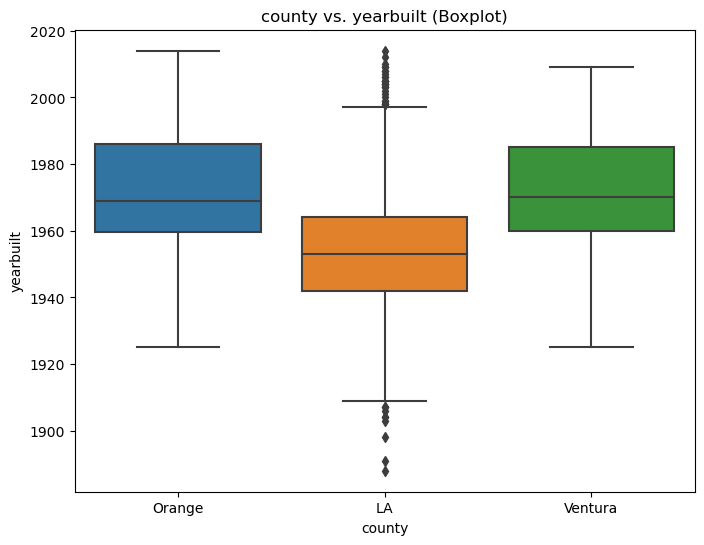

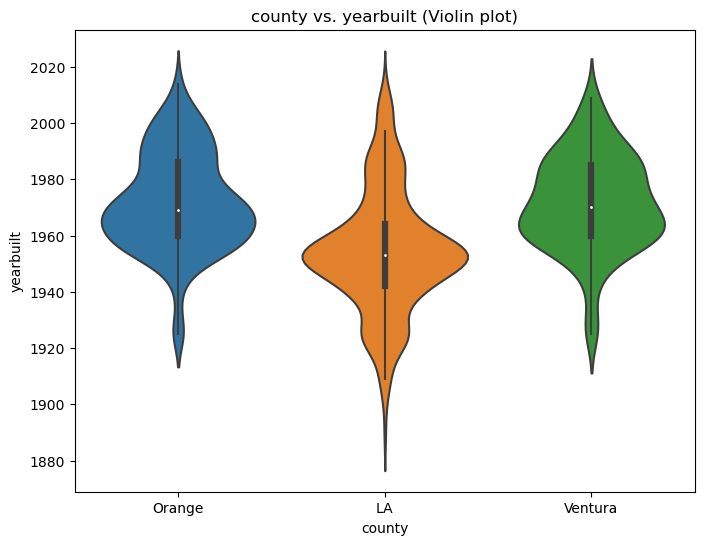

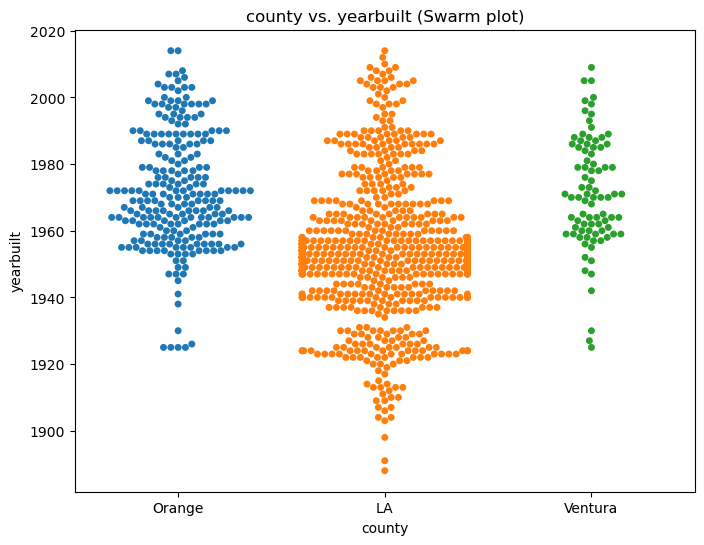

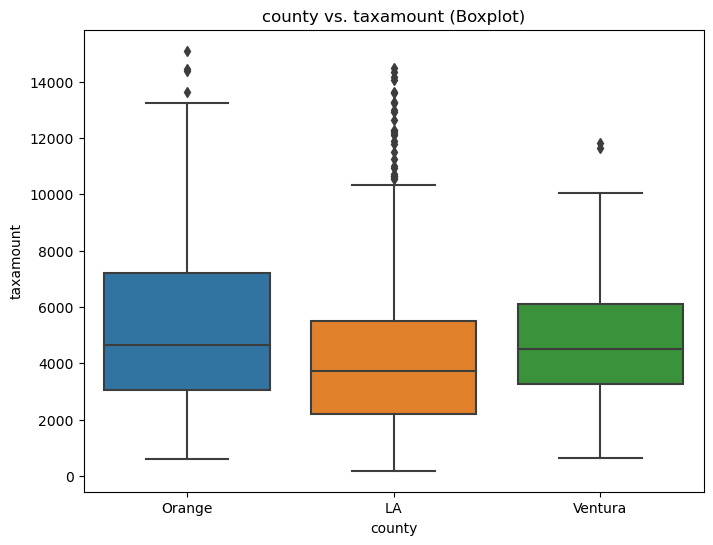

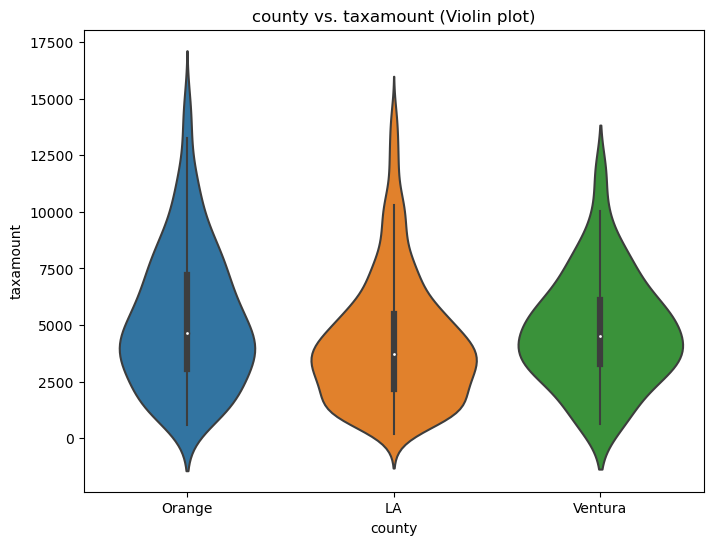

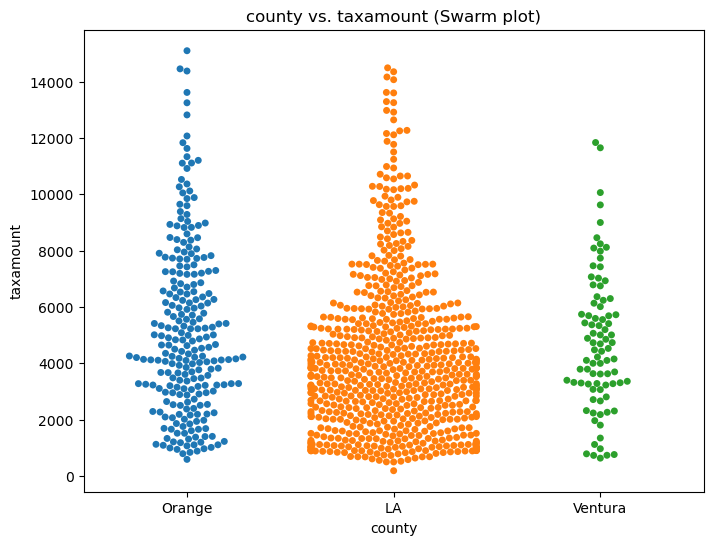

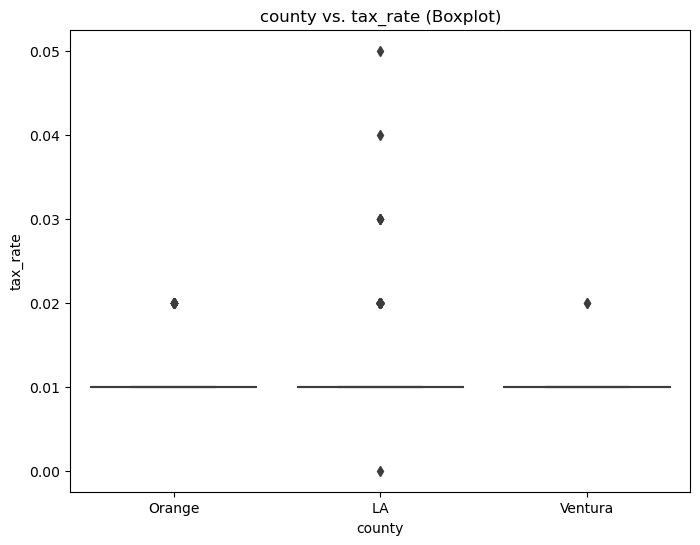

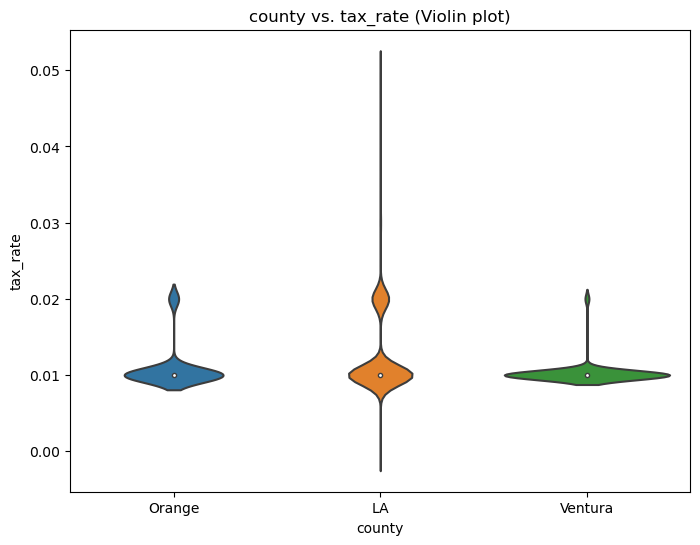

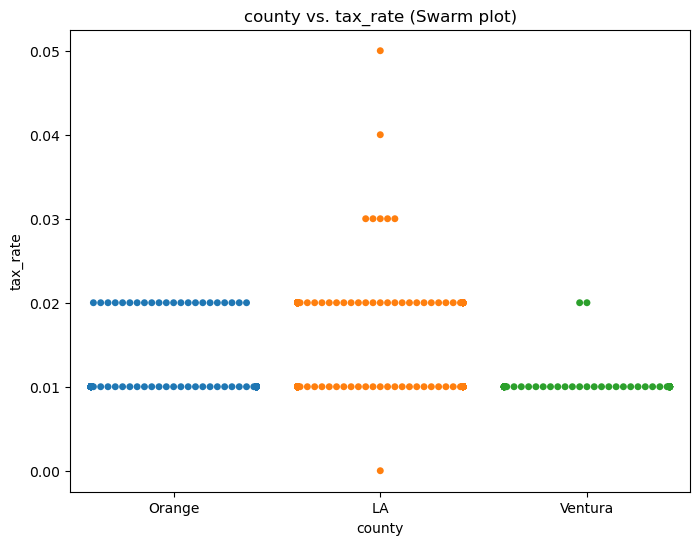

In [88]:
plot_categorical_and_continuous_vars(tr_sub, cat_var, cont_var)

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

#### Hypothesis

You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data **to predict property values** using some of their available features; who knows, you might even do some feature engineering to blow them away. **Your goal is to predict the values of single unit properties using the observations from 2017.**

     $H_{0}$ : There is not  a linear relationship between number of bedrooms and property values.

     $H_{a}$ : There is a linear relationship between number of bedrooms and property values.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between number of bathrooms and property value.

     $H_{a}$ : There is a relationship between number of bathrooms and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between area and property value.

     $H_{a}$ : There is a relationship between area and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between county code and property value.

     $H_{a}$ : There is a relationship between county code and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between year built and property value.

     $H_{a}$ : There is a relationship between year built and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between tax amount and property value.

     $H_{a}$ : There is a relationship between tax amount and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between tax rate and property value.

     $H_{a}$ : There is a relationship between tax rate and property value.
### ----------------------------------------------------------------------------------

### 8. Visualize all combinations of variables in some way.

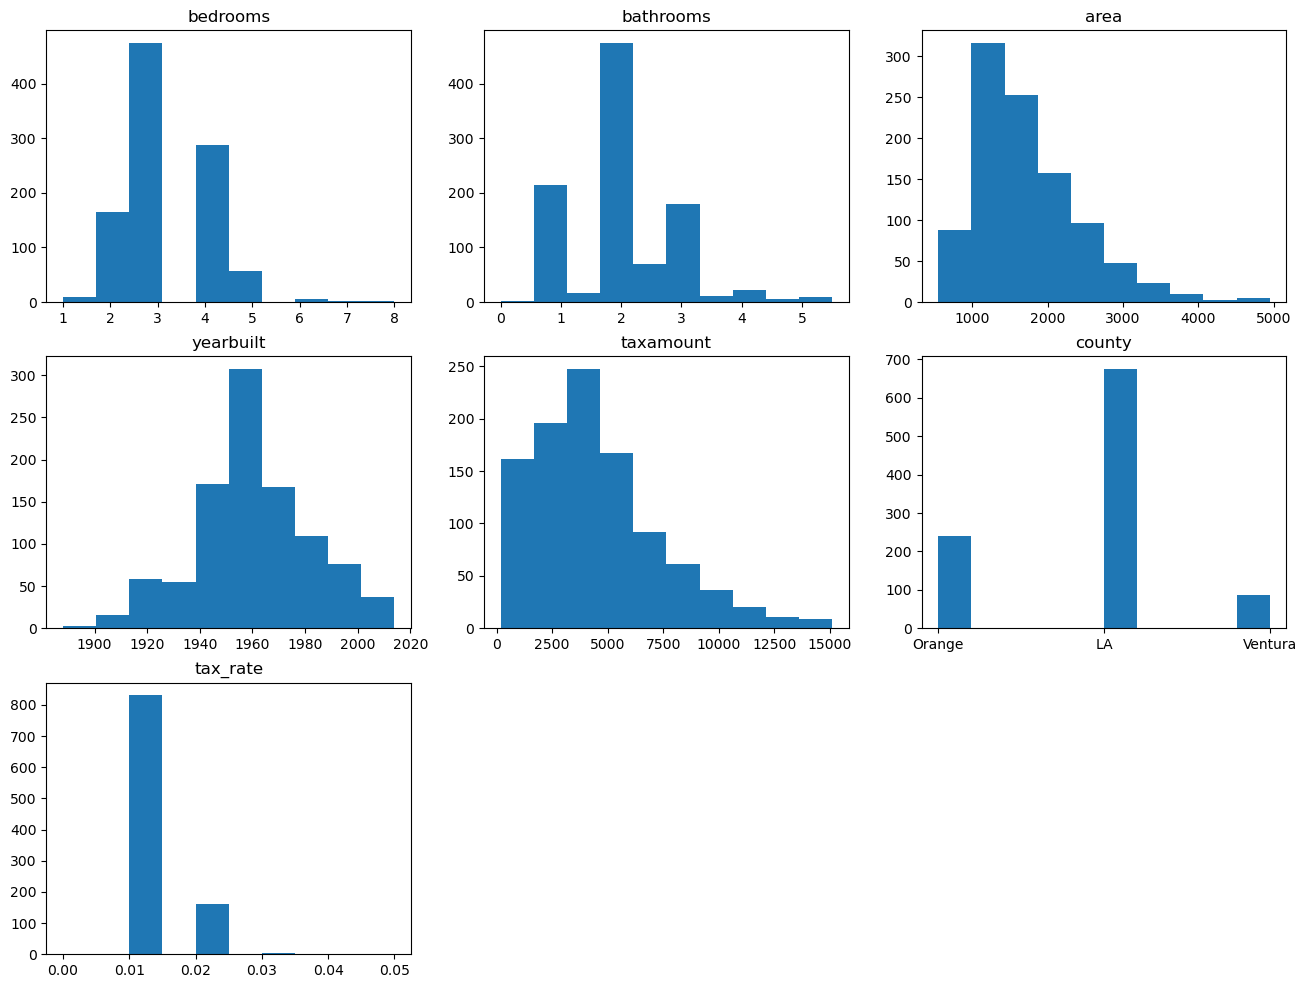

In [67]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['bedrooms','bathrooms','area','yearbuilt','taxamount','county','tax_rate']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

In [18]:
def plot_categorical_and_continuous_vars(df, cat_var, cont_var):

    # Boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Boxplot)")
    plt.show()

    # Violin plot
    plt.figure(figsize=(8,6))
    sns.violinplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Violin plot)")
    plt.show()

    # Swarm plot
    plt.figure(figsize=(8,6))
    sns.swarmplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Swarm plot)")
    plt.show()


In [26]:
cat_var = ['bedrooms', 'bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

for cat_col in cat_var:
    for cont_col in cont_var:
        plot_categorical_and_continuous_vars(tr_sub, cat_col, cont_col)

SyntaxError: unexpected EOF while parsing (2387597254.py, line 6)

### 9. Run the appropriate statistical tests where needed.

In [93]:
# Create the correlation matrix for all exams.

tr_sub_corr = tr_sub.drop(columns=['taxvalue']).corr()
tr_sub_corr

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.557747,0.599477,0.343533,0.224195,-0.070008
bathrooms,0.557747,1.000000,0.794168,0.508563,0.458041,-0.117794
area,0.599477,0.794168,1.000000,0.429707,0.530414,-0.122090
yearbuilt,0.343533,0.508563,0.429707,1.000000,0.271234,0.003211
taxamount,0.224195,0.458041,0.530414,0.271234,1.000000,-0.249470
tax_rate,-0.070008,-0.117794,-0.122090,0.003211,-0.249470,1.000000


In [98]:
# Since my variables are not normally distributed, I might choose Pearsonr instead.

tr_sub_pearsonr = tr_sub.drop(columns=['taxvalue']).corr(method='pearson')
tr_sub_pearsonr

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.557747,0.599477,0.343533,0.224195,-0.070008
bathrooms,0.557747,1.000000,0.794168,0.508563,0.458041,-0.117794
area,0.599477,0.794168,1.000000,0.429707,0.530414,-0.122090
yearbuilt,0.343533,0.508563,0.429707,1.000000,0.271234,0.003211
taxamount,0.224195,0.458041,0.530414,0.271234,1.000000,-0.249470
tax_rate,-0.070008,-0.117794,-0.122090,0.003211,-0.249470,1.000000


In [99]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.22605028666955101
P-value: 4.716630442100821e-13


In [14]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_sub_spearman = tr_sub.drop(columns=['taxvalue']).corr(method='spearman')
tr_sub_spearman

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.566998,0.633199,0.414216,0.236539,-0.046877
bathrooms,0.566998,1.000000,0.798021,0.582490,0.429430,-0.108465
area,0.633199,0.798021,1.000000,0.487551,0.467999,-0.127832
yearbuilt,0.414216,0.582490,0.487551,1.000000,0.247867,0.004857
taxamount,0.236539,0.429430,0.467999,0.247867,1.000000,-0.334515
tax_rate,-0.046877,-0.108465,-0.127832,0.004857,-0.334515,1.000000


In [96]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.23917132079892775
P-value: 1.783889130642984e-14


In [24]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_spearman = tr_sub.corr(method='spearman')
tr_spearman

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.566998,0.633199,0.239171,0.414216,0.236539,-0.046877
bathrooms,0.566998,1.000000,0.798021,0.435153,0.582490,0.429430,-0.108465
area,0.633199,0.798021,1.000000,0.475546,0.487551,0.467999,-0.127832
taxvalue,0.239171,0.435153,0.475546,1.000000,0.251112,0.974401,-0.450764
yearbuilt,0.414216,0.582490,0.487551,0.251112,1.000000,0.247867,0.004857
taxamount,0.236539,0.429430,0.467999,0.974401,0.247867,1.000000,-0.334515
tax_rate,-0.046877,-0.108465,-0.127832,-0.450764,0.004857,-0.334515,1.000000


### 10. What independent variables are correlated with the dependent variable, home value?

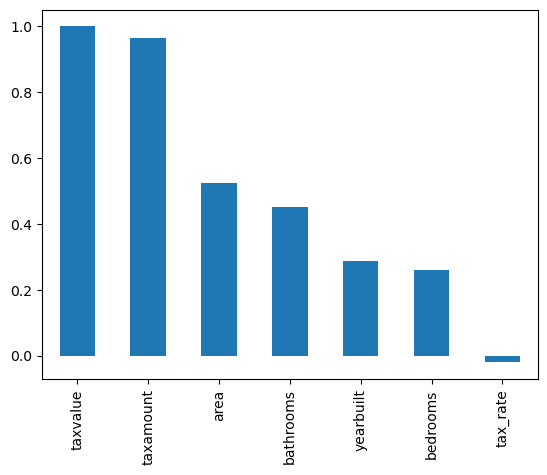

In [100]:
train.corr()['taxvalue'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

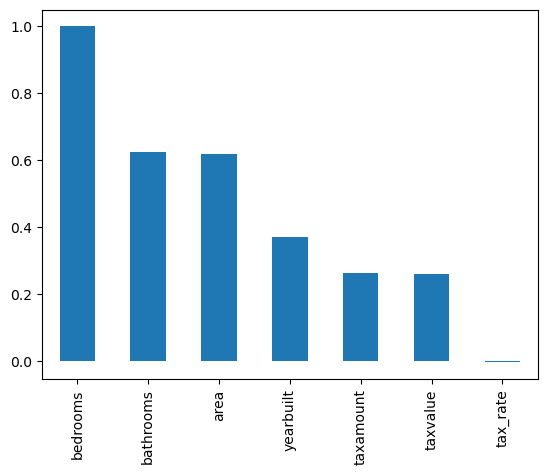

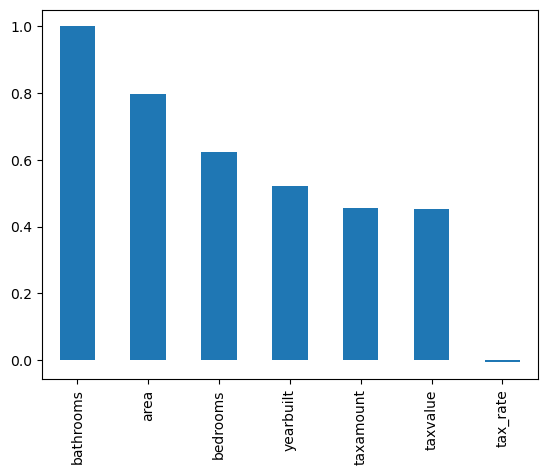

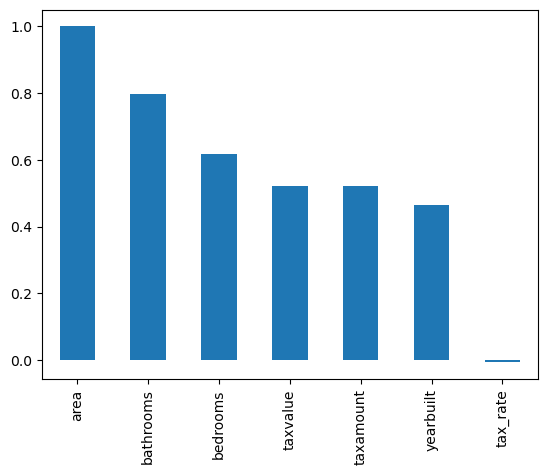

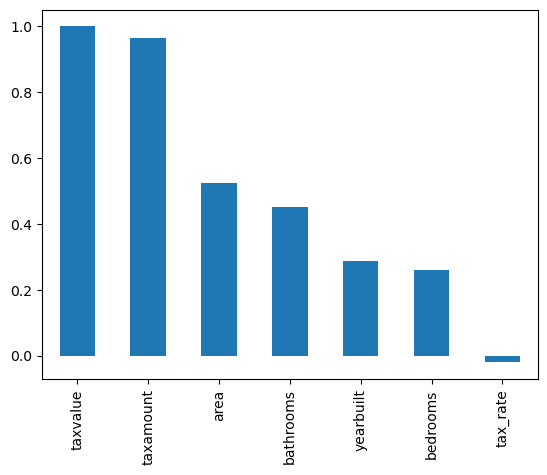

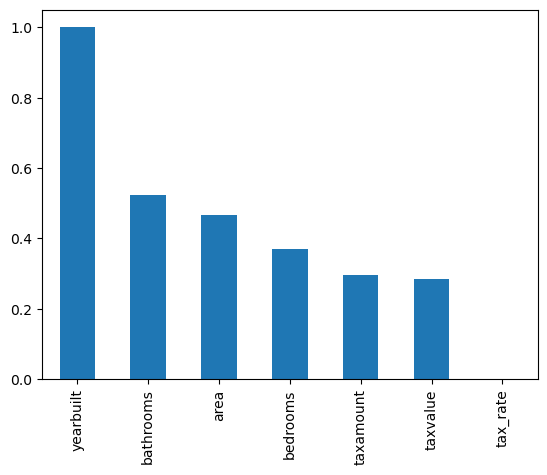

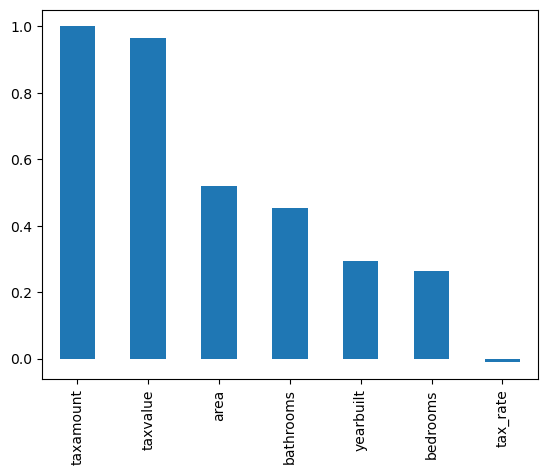

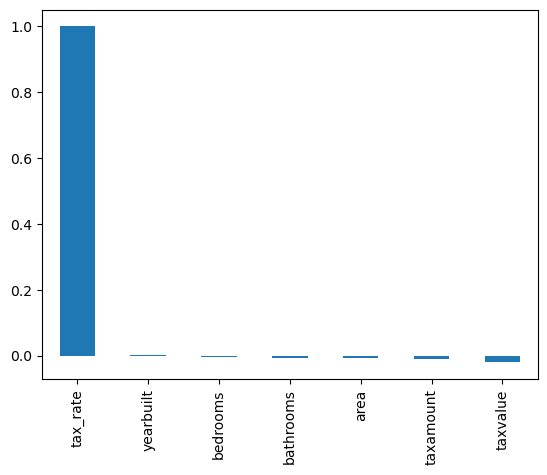

In [101]:
cols = ['bedrooms','bathrooms','area','taxvalue','yearbuilt','taxamount','tax_rate']
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.show()

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.

Bedrooms: Properties with more bedrooms will have a higher sale price.
Bathrooms: Properties with more bathrooms will have a higher sale price.
Area: Properties with a larger area will have a higher sale price.
Year built: Properties that are newer will have a higher sale price.
Tax amount: Properties with a higher tax amount will have a higher sale price.
Tax rate: Properties with a lower tax rate will have a higher sale price.

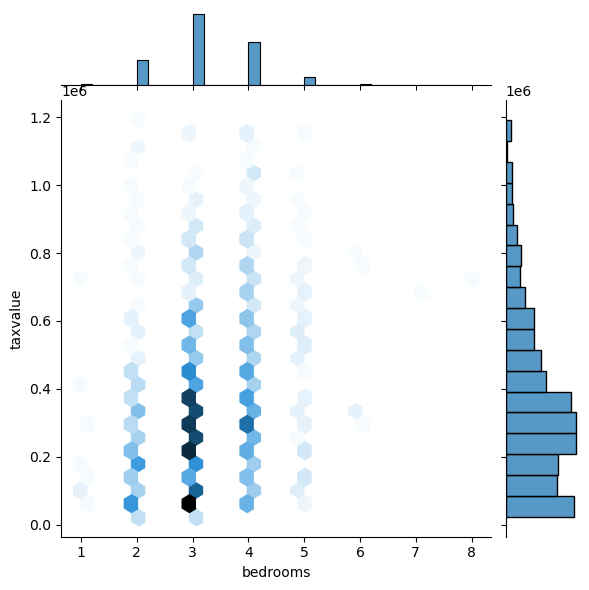

In [107]:
# Create a hexbin plot
sns.jointplot(data=tr_sub, x='bedrooms', y='taxvalue', kind='hex')